## Lab11

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


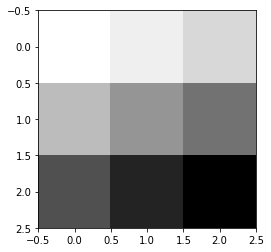

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


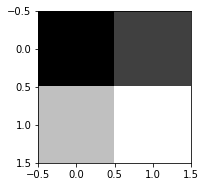

In [5]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


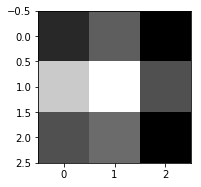

In [6]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


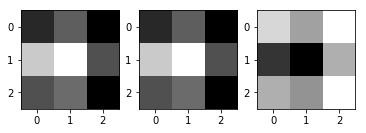

In [7]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [8]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


In [9]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


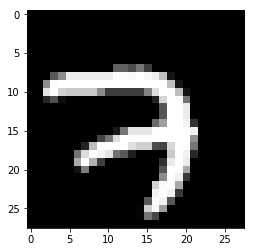

In [12]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_5:0", shape=(1, 14, 14, 5), dtype=float32)


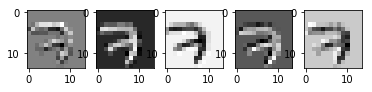

In [13]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


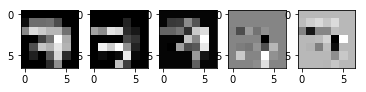

In [14]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

Adding layers

In [15]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={ X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch: 0001 cost = 0.349303550
Epoch: 0002 cost = 0.098451936
Epoch: 0003 cost = 0.072221011
Epoch: 0004 cost = 0.061433203
Epoch: 0005 cost = 0.051616609
Epoch: 0006 cost = 0.044650704
Epoch: 0007 cost = 0.040392208
Epoch: 0008 cost = 0.035861161
Epoch: 0009 cost = 0.032525706
Epoch: 0010 cost = 0.028355539
Epoch: 0011 cost = 0.024863857
Epoch: 0012 cost = 0.022373049
Epoch: 0013 cost = 0.020726949
Epoch: 0014 cost = 0.017297130
Epoch: 0015 cost = 0.016717417


ResourceExhaustedError: OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D_6 = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Conv2D_6-0-TransposeNHWCToNCHW-LayoutOptimizer, Variable_1/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: Mean_1/_13 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_48_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'Conv2D_6', defined at:
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\ipykernel\kernelapp.py", line 497, in start
    self.io_loop.start()
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tornado\platform\asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-9c895553c5a9>", line 15, in <module>
    L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 1042, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\renz\AppData\Local\conda\conda\envs\tensorflow3.6.5\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D_6 = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Conv2D_6-0-TransposeNHWCToNCHW-LayoutOptimizer, Variable_1/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: Mean_1/_13 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_48_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



Deep CNN

In [22]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])  #img 28*28*1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))

L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))

L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev = 0.01))

L3 = tf.nn.conv2d(L2, W3, strides = [1,1,1,1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L3= tf.nn.dropout(L3, keep_prob = keep_prob)
L3 = tf.reshape(L3, [-1, 128*4*4])

W4 = tf.get_variable('W4', shape = [4*4*128,625],
                    initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

W5 = tf.get_variable('W5', shape = [625, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

#define cost/loss & optimizer
learning_rate = 0.001

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis,
                                                             labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

#train my model
training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
for i in range(10):
    testSet = mnist.test.next_batch(50)
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X:testSet[0], Y: testSet[1], keep_prob : 1}))

Epoch:  0001 cost =  0.342191438
Epoch:  0002 cost =  0.098262232
Epoch:  0003 cost =  0.073345328
Epoch:  0004 cost =  0.058955216
Epoch:  0005 cost =  0.051215728
Epoch:  0006 cost =  0.044548560
Epoch:  0007 cost =  0.040828705
Epoch:  0008 cost =  0.039470199
Epoch:  0009 cost =  0.036123899
Epoch:  0010 cost =  0.034605656
Epoch:  0011 cost =  0.029684256
Epoch:  0012 cost =  0.029568159
Epoch:  0013 cost =  0.027369130
Epoch:  0014 cost =  0.026643345
Epoch:  0015 cost =  0.027689641
Accuracy:  0.98
Accuracy:  0.96
Accuracy:  1.0
Accuracy:  0.96
Accuracy:  1.0
Accuracy:  0.98
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  0.98


class로 model을 간결하게 구현하자!

In [31]:
tf.reset_default_graph()
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [32]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
    
    def _build_net(self):   #n = 5
        with tf.variable_scope(self.name):
            #input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            #img 28*28*1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])
            self.keep_prob = tf.placeholder(tf.float32)
            
            #L1 ImgIn shape = (?, 28, 28, 1)
            W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
            #    Conv     -> (?, 28, 28, 32)
            #    Pool     -> (?, 14, 14, 32)
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)

            # L2 ImgIn shape=(?, 14, 14, 32)
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            #    Conv      ->(?, 14, 14, 64)
            #    Pool      ->(?, 7, 7, 64)
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)

            # L3 ImgIn shape=(?, 7, 7, 64)
            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            #    Conv      ->(?, 7, 7, 128)
            #    Pool      ->(?, 4, 4, 128)
            #    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                                1, 2, 2, 1], padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)

            L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

            # L4 FC 4x4x128 inputs -> 625 outputs
            W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)

            # L5 Final FC 625 inputs -> 10 outputs
            W5 = tf.get_variable("W5", shape=[625, 10],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})
    


In [33]:
sess = tf.Session()
m1 = Model(sess, 'm1')

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch
    
    print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning Started!
Epoch:  0001 cost =  0.391672520
Epoch:  0002 cost =  0.091585207
Epoch:  0003 cost =  0.069010094
Epoch:  0004 cost =  0.056427574
Epoch:  0005 cost =  0.050748391
Epoch:  0006 cost =  0.043476240
Epoch:  0007 cost =  0.042072330
Epoch:  0008 cost =  0.036206245
Epoch:  0009 cost =  0.037325306
Epoch:  0010 cost =  0.031442440
Epoch:  0011 cost =  0.031336346
Epoch:  0012 cost =  0.031402338
Epoch:  0013 cost =  0.025140492
Epoch:  0014 cost =  0.026890303
Epoch:  0015 cost =  0.024261917
Learning Finished!


## Lab12

RNN Basics

In [37]:
tf.reset_default_graph() 
import tensorflow as tf
import pprint
import numpy as np

pp = pprint.PrettyPrinter()

hidden_size = 2
cell = tf.contrib.rnn.BasicLSTMCell(num_units= hidden_size)

x_data = np.array([[[1,0,0,0]]], dtype = np.float32)
outputs, _status = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)

config = tf.ConfigProto(device_count={'GPU': 0})
sess = tf.Session(config = config)
sess.run(tf.global_variables_initializer())
pp.pprint(outputs.eval(session = sess))

array([[[-0.17962709,  0.06893022]]], dtype=float32)


In [38]:
tf.reset_default_graph() 
#One cell RNN input_dim(4) -> output_dim (2), sequence: 5
#one hot encoding
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]

hidden_size = 2
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_size) #cell 생성
x_data = np.array([[h, e, l, l,o]], dtype = np.float32)
print(x_data.shape) #dim = 4, len = 5
pp.pprint(x_data)

outputs, states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32) #y값들

config = tf.ConfigProto(device_count={'GPU': 0})
sess = tf.Session(config = config)
sess.run(tf.global_variables_initializer())
pp.pprint(outputs.eval(session = sess))

(1, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)
array([[[ 0.0168858 ,  0.0312864 ],
        [-0.10008863,  0.05492236],
        [-0.11125017, -0.12167816],
        [-0.12911876, -0.2356927 ],
        [-0.11376934, -0.20391332]]], dtype=float32)


In [39]:

tf.reset_default_graph()

x_data = np.array([[h, e, l, l, o],
                  [e, o, l, l, l],
                  [l,l,e,e,l]], dtype = np.float32)

pp.pprint(x_data)

cell = tf.contrib.rnn.BasicLSTMCell(num_units = 2, state_is_tuple = True)
outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)

config = tf.ConfigProto(device_count={'GPU': 0})
sess = tf.Session(config = config)
sess.run(tf.global_variables_initializer())
pp.pprint(outputs.eval(session = sess))

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[ 0.08549473, -0.02752551],
        [ 0.02691756,  0.02521484],
        [ 0.05831525,  0.02136325],
        [ 0.07895692,  0.01699827],
        [ 0.19066066, -0.0748955 ]],

       [[-0.05041188,  0.0673624 ],
        [ 0.09539095, -0.0240733 ],
        [ 0.08061592, -0.01657841],
        [ 0.09156995, -0.01201838],
        [ 0.09725583, -0.00988409]],

       [[ 0.04854891,  0.00802143],
        [ 0.07406029,  0.00865404],
        [ 0.01500892,  0.06152744],
        [-0.04244129,  0.10738098],
        [ 0.03015067,  0.08156554]]], dtype=float32)


In [42]:
tf.reset_default_graph()

hidden_size = 5
input_dim = 5
batch_size = 1 #one sentence
sequence_length = 6  

idx2char = ['h', 'i', 'e','l', 'o']
x_data = [[0,1,0,2,3,3]] 
x_one_hot = [[[1,0,0,0,0],
              [0,1,0,0,0],
              [1,0,0,0,0],
              [0,0,1,0,0],
              [0,0,0,1,0],
              [0,0,0,1,0]]]

y_data = [[1,0,2,3,3,4]] 
X = tf.placeholder(tf.float32, [None, sequence_length, input_dim]) #X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length])

cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_size, state_is_tuple = True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state = initial_state, dtype = tf.float32)
sess.close()

In [45]:
y_data = tf.constant([[1,1,1]])

prediction1 = tf.constant([[[0.3, 0.7],[0.3, 0.7], [0.3, 0.7]]], dtype = tf.float32)
prediction2 = tf.constant([[[0.1,0.9],[0.1,0.9],[0.1,0.9]]], dtype = tf.float32)

weights = tf.constant([[1,1,1]], dtype = tf.float32)

sequence_loss1 = tf.contrib.seq2seq.sequence_loss(prediction1, y_data, weights)
sequence_loss2 = tf.contrib.seq2seq.sequence_loss(prediction2, y_data, weights)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


print('Loss1: ', sequence_loss1.eval(session = sess), 
     'Loss2: ', sequence_loss2.eval(session = sess))
sess.close()

Loss1:  0.5130153 Loss2:  0.37110072
